# Exercise 2

Work on this before the next lecture on 12 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to your GitHub repository for this course before the next lecture starts and post a link to your repository in [this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/3). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

In [14]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

# Question 1

Build your own random forest classifier! Using the `DecisionTreeClassifier` from scikit-learn (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) construct your own `RandomForestClassifier`.

There are two methods for adding randomisation to the tree growing process:

* grow each tree on a bootstrap sample of the data
* configure each tree to select a subset of features for each split

Try out your new `RandomForestClassifier` on the https://archive.ics.uci.edu/ml/datasets/bank+marketing dataset.

**Note:** To test your classifier it is a good idea to use a smaller dataset like the `make_blobs` from the lecture. It will run much faster and be easier to debug.

* Can you show that a forest of trees that are all the same performs like a single decision tree?
* Can you compute the correlation coefficient between scores assigned by two different trees in the forest? In order to gain from buildign a forest you want your trees to not be 100% correlated. Experiment with the different randomisation strategies to check that they work.

In [341]:
# your code here
from sklearn.datasets import make_blobs

labels = ['b', 'r']
X, y = make_blobs(n_samples=800, n_features=10, centers=2, cluster_std=7.0)

y_label = np.take(labels, (y < 1))

In [58]:
from sklearn import ensemble, cross_validation, learning_curve, metrics, datasets, tree 
from sklearn import grid_search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import xgboost as xgb
import numpy as np
import pandas as pd

In [230]:
tree_clf = tree.DecisionTreeClassifier(random_state=1)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [231]:
np.mean(cross_validation.cross_val_score(tree_clf,X,y,cv=10))

0.8612499999999998

Realization of bagging

In [232]:
bagg_tree_clf = ensemble.BaggingClassifier(tree_clf, n_estimators=100)

In [233]:
np.mean(cross_validation.cross_val_score(bagg_tree_clf,X,y,cv=10))

0.8987499999999999

Comparing the corraltion of two trees aquiring random samples

In [242]:
bagg_tree_clf1 = ensemble.BaggingClassifier(tree_clf, n_estimators=1, random_state=100)
bagg_tree_clf2 = ensemble.BaggingClassifier(tree_clf, n_estimators=1,random_state=200)
X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.7)

C:\Users\lukashch\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [243]:
bagg_tree_clf1.fit(X_train,y_train)
bagg_tree_clf2.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1, n_jobs=1, oob_score=False,
         random_state=200, verbose=0, warm_start=False)

In [244]:
print(bagg_tree_clf1.score(X_test,y_test),bagg_tree_clf2.score(X_test,y_test))

0.8583333333333333 0.8083333333333333


In [245]:
bagg_tree_clf1.predict(X_test)

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [246]:
bagg_tree_clf2.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [247]:
import scipy as sc
sc.stats.pearsonr(bagg_tree_clf1.predict(X_test),bagg_tree_clf2.predict(X_test))

(0.6676168305484814, 2.4600613584983268e-32)

* Can you show that a forest of trees that are all the same performs like a single decision tree?

That is evident

* Can you compute the correlation coefficient between scores assigned by two different trees in the forest? In order to gain from buildign a forest you want your trees to not be 100% correlated. Experiment with the different randomisation strategies to check that they work.

Trees via begging realization seem to be uncorrelated

Realization of random subspaces

In [56]:
tree_random_node_clf = tree.DecisionTreeClassifier(max_features = 3)

In [57]:
my_RF_clf = ensemble.BaggingClassifier(tree_random_node_clf, n_estimators=100)

In [58]:
np.mean(cross_validation.cross_val_score(my_RF_clf,X,y,cv=10))

0.9475000000000001

Real RF

In [54]:
clf_RF = ensemble.RandomForestClassifier(n_estimators=100)

In [55]:
np.mean(cross_validation.cross_val_score(clf_RF,X,y,cv=10))

0.94625

## Bank Marketing Data Set

In [158]:
data = pd.read_csv('bank-additional/bank-additional-full.csv', header=0, sep=';')

In [159]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [160]:
data.shape

(41188, 21)

In [161]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [174]:
y = data.y.values
y = np.take([0, 1], (y == 'yes'))

In [175]:
numeric_cols = [0,10,11,12,13,15,16,17,18,19]
categorial_cols = list(set(np.arange(0,20))-set(numeric_cols) )
categorial_cols

[1, 2, 3, 4, 5, 6, 7, 8, 9, 14]

In [176]:
cat_cols = np.take(data.columns,categorial_cols)
num_cols = np.take(data.columns,numeric_cols)

In [177]:
X_cat = data[cat_cols]
X_num = data[num_cols]

In [178]:
X_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [168]:
X_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [179]:
X_cat['marital'] = pd.Categorical(X_cat['marital'])

C:\Users\lukashch\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [190]:
X_cat_pd_codes = X_cat
X_cat_pd_dummies = X_cat

In [191]:
X_cat_pd_dummies = pd.get_dummies(X_cat)

In [186]:
for cols in cat_cols:
    X_cat_pd_codes[cols] = pd.Categorical(X_cat[cols])
    X_cat_pd_codes[cols] = X_cat_pd_codes[cols].cat.codes

C:\Users\lukashch\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lukashch\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [188]:
X_cat_pd_codes.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1


In [192]:
X_cat_pd_dummies.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1


In [194]:
X_coded = np.hstack((X_num,X_cat_pd_dummies))

In [198]:
X_coded.shape

(41188, 20)

In [199]:
y.shape

(41188,)

In [200]:
 X_train,X_test, y_train,y_test = train_test_split(X_coded, y, train_size=0.7)

C:\Users\lukashch\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [201]:
my_RF_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [204]:
my_RF_clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [202]:
my_RF_clf.score(X_test,y_test)

0.9153516225621106

# Question 2

Use the ready made `RandomForestClassifier` from scikit-learn to create the best model you can for the Bank Marketing dataset. Use `GridSearchCV` (or any other method) to tune your model and possible pre-processing steps. Make sure you have a test set to use after you are done tuning to estimate your generalisation error.

In [203]:
clf_RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [205]:
clf_RF.score(X_test,y_test)

0.9140568099053168

In [217]:
parameters_grid = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : np.arange(80,260,40),
    'max_features' : np.arange(3 , 12, 3),
    'max_depth' : np.arange(2,50,6),
    'min_samples_leaf' : np.arange(1,30,5)
}

In [218]:
grid_cv = grid_search.RandomizedSearchCV(clf_RF, parameters_grid, scoring = 'accuracy', cv = 3,random_state = 0,n_iter = 20)

In [219]:
%%time
grid_cv.fit(X_train, y_train)

Wall time: 4min 4s


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'criterion': ['gini', 'entropy'], 'n_estimators': array([ 80, 120, 160, 200, 240]), 'max_features': array([3, 6, 9]), 'max_depth': array([ 2,  8, 14, 20, 26, 32, 38, 44]), 'min_samples_leaf': array([ 1,  6, 11, 16, 21, 26])},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          scoring='accuracy', verbose=0)

In [220]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.9173459123859734
{'n_estimators': 160, 'min_samples_leaf': 1, 'max_features': 9, 'max_depth': 8, 'criterion': 'gini'}


In [221]:
grid_cv.best_estimator_.score(X_test,y_test)

0.9181030994577972

In [224]:
# your code here
grid_cv.grid_scores_[:10]

[mean: 0.90097, std: 0.00105, params: {'n_estimators': 240, 'min_samples_leaf': 1, 'max_features': 6, 'max_depth': 2, 'criterion': 'gini'},
 mean: 0.91686, std: 0.00125, params: {'n_estimators': 120, 'min_samples_leaf': 11, 'max_features': 9, 'max_depth': 20, 'criterion': 'entropy'},
 mean: 0.91627, std: 0.00191, params: {'n_estimators': 120, 'min_samples_leaf': 26, 'max_features': 9, 'max_depth': 32, 'criterion': 'entropy'},
 mean: 0.91367, std: 0.00115, params: {'n_estimators': 200, 'min_samples_leaf': 1, 'max_features': 9, 'max_depth': 20, 'criterion': 'gini'},
 mean: 0.91499, std: 0.00022, params: {'n_estimators': 120, 'min_samples_leaf': 21, 'max_features': 6, 'max_depth': 8, 'criterion': 'gini'},
 mean: 0.91336, std: 0.00005, params: {'n_estimators': 240, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 26, 'criterion': 'gini'},
 mean: 0.91461, std: 0.00024, params: {'n_estimators': 200, 'min_samples_leaf': 6, 'max_features': 3, 'max_depth': 38, 'criterion': 'gini'},
 mean:

# Question 3

Compare the feature importances calculated by a `RandomForestClassifier`, `ExtraTreesClassifier` and `GradientBoostedTreesClassifier` on the california housing dataset. You might have to tune `n_estimators` and other hyper-parameters to get good performance.

Plot each of the features as a scatter plot with the target to learn about each variable. You can also make a plot of two features and use the target as colour.

Fit a model and tune the model complexity using a training and test data set.

Explore the feature importances and partial dependences that are important to the house price.

In [1]:
from sklearn.datasets.california_housing import fetch_california_housing

cal_housing = fetch_california_housing()

# if the above doesn't work, download `cal_housing_py3.pkl` from the GitHub repository
# and adjust the path to the downloaded file which is passed to `load()`
# uncomment the following lines
#from sklearn.externals.joblib import load
#d = load('/home/username/Downloads/cal_housing_py3.pkz')
#X, y = d[:,1:], d[:,0]/100000
#X[:, 2] /= X[:, 5]
#X[:, 3] /= X[:, 5]
#X[:, 5] = X[:, 4] / X[:, 5]

# your code here

In [2]:
cal_housing

{'DESCR': 'California housing dataset.\n\nThe original database is available from StatLib\n\n    http://lib.stat.cmu.edu/datasets/\n\nThe data contains 20,640 observations on 9 variables.\n\nThis dataset contains the average house value as target variable\nand the following input variables (features): average income,\nhousing average age, average rooms, average bedrooms, population,\naverage occupation, latitude, and longitude in that order.\n\nReferences\n----------\n\nPace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,\nStatistics and Probability Letters, 33 (1997) 291-297.\n\n',
 'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ..., 
        [   1.7       ,   17.    

In [59]:
cal_housing.feature_names+['target']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'target']

In [9]:
all(isinstance(x, (int, float)) for x in np.ravel(cal_housing.data.reshape((-1,1))) )

True

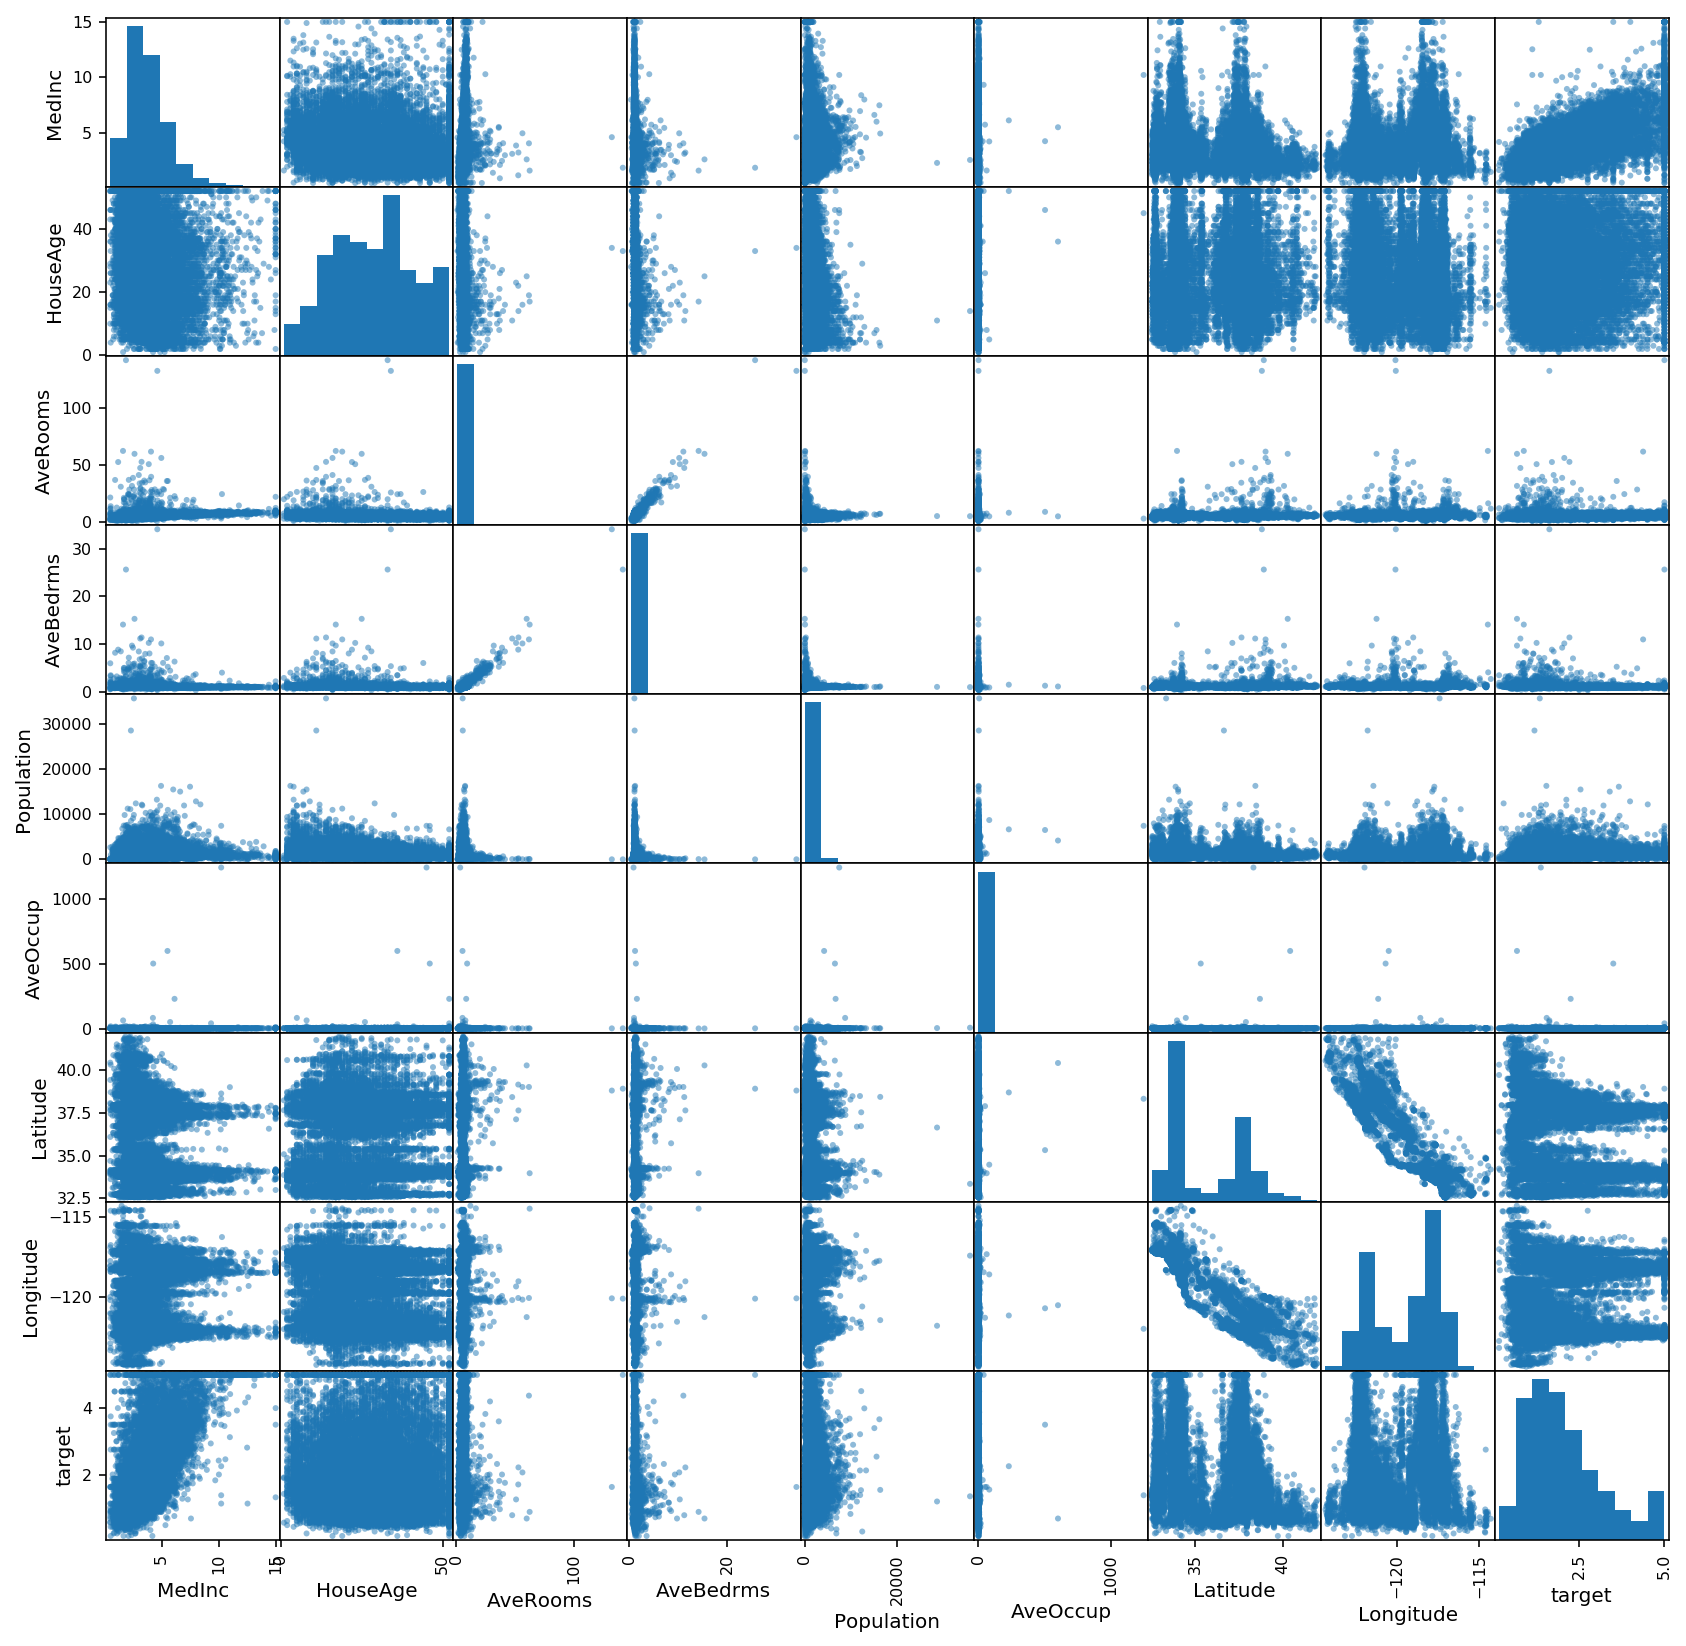

In [74]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(np.hstack((cal_housing.data,cal_housing.target.reshape((-1,1)) )), columns=cal_housing.feature_names+['target'])
#list_cols = cal_housing.feature_names
scatter_matrix(data_numeric, alpha=0.5, figsize=(14, 14))
plt.show()

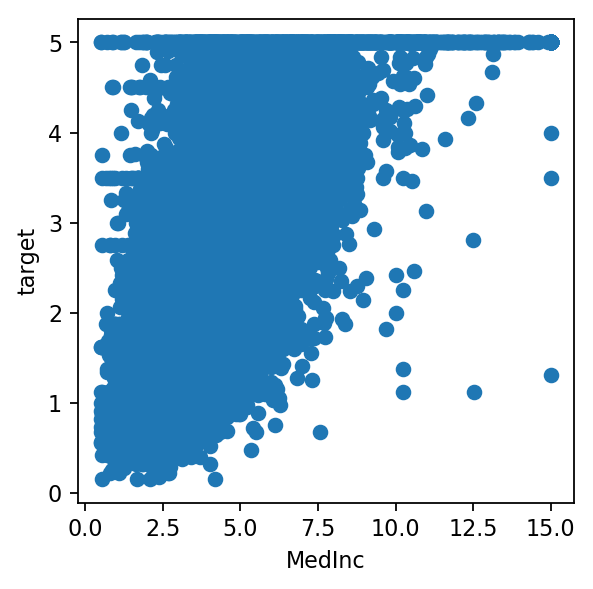

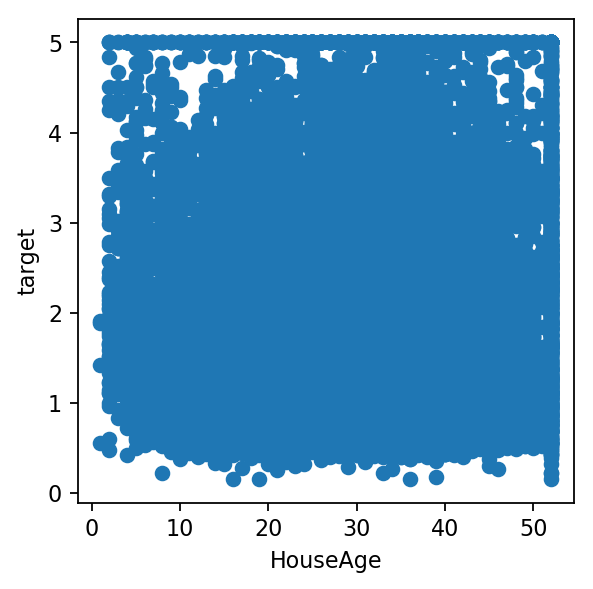

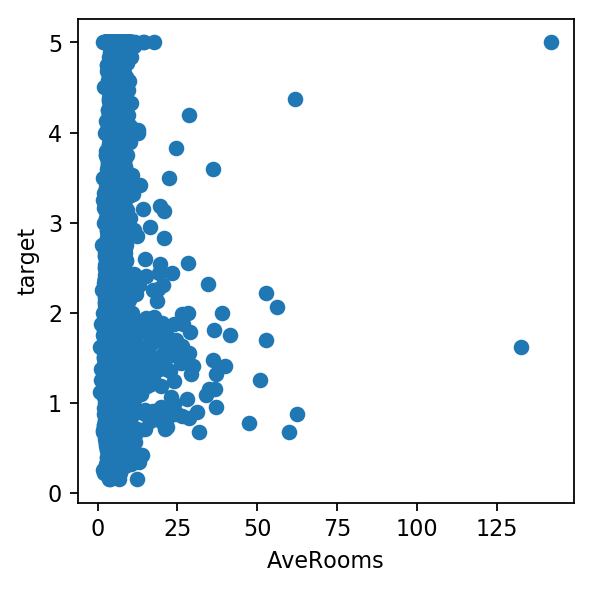

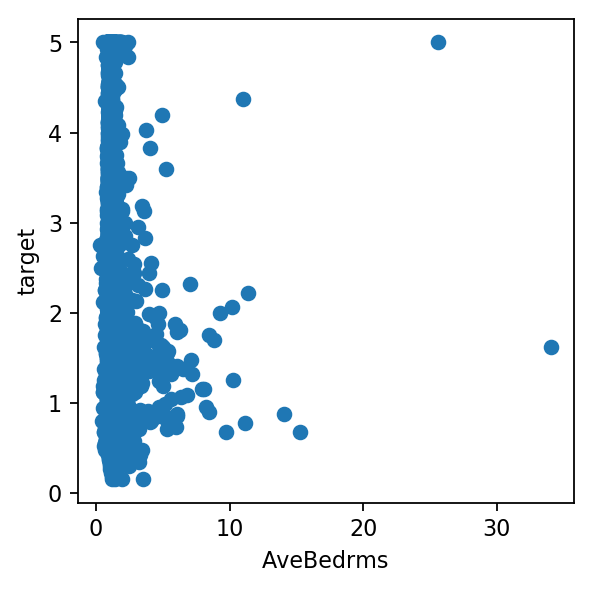

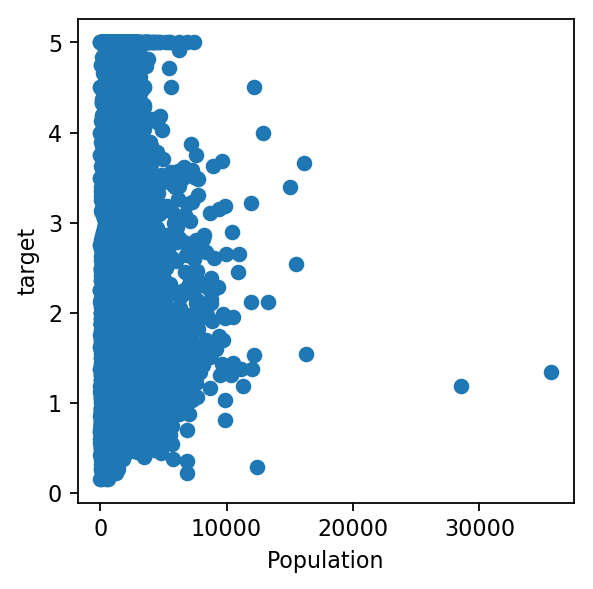

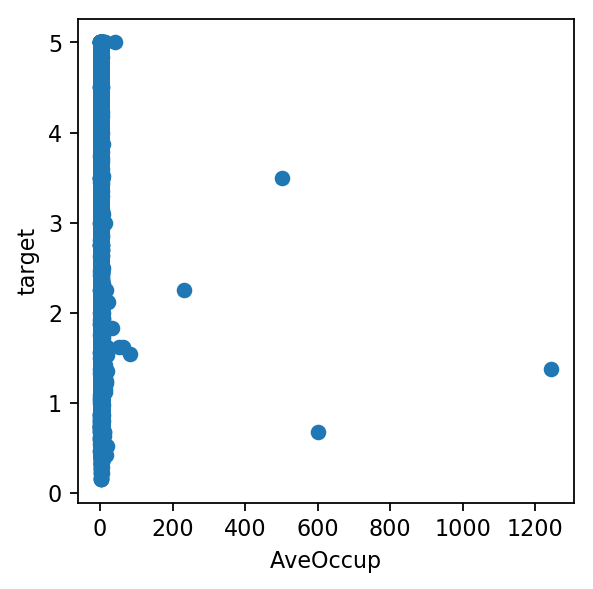

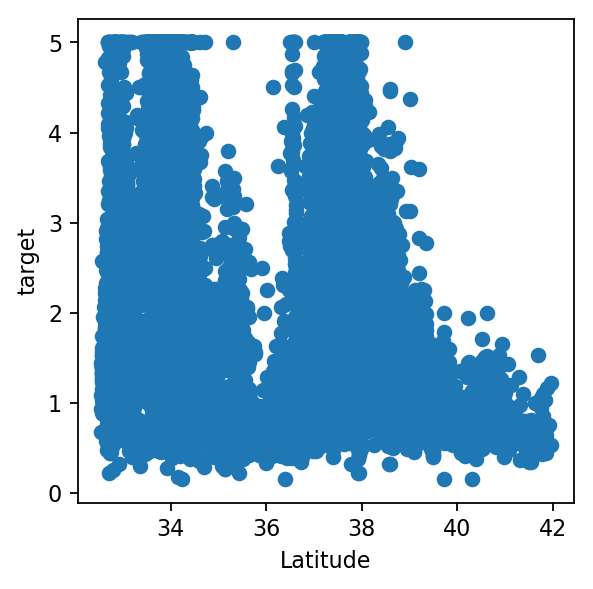

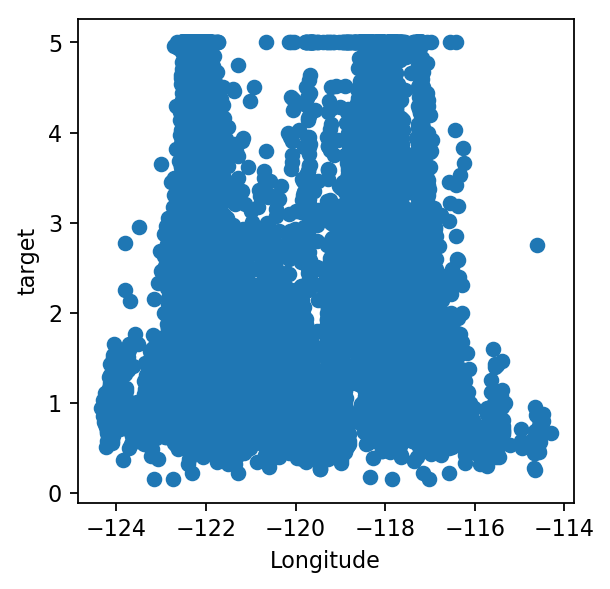

In [11]:
#fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(cal_housing.feature_names):
    #plt.subplot(8, idx+1, 1)
    plt.figure(figsize=(4, 4), dpi=80)
    plt.scatter(np.ravel(cal_housing.data[:,idx]), cal_housing.target)
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.show()

Compare the feature importances calculated by a RandomForestClassifier, ExtraTreesClassifier and GradientBoostedTreesClassifier on the california housing dataset. You might have to tune n_estimators and other hyper-parameters to get good performance.

In [36]:
X_train,X_test, y_train,y_test = train_test_split(cal_housing.data, cal_housing.target, train_size=0.7)

C:\Users\lukashch\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# RF and EX estimators

In [26]:
Reg_RF = ensemble.RandomForestRegressor()
Reg_EX = ensemble.ExtraTreesRegressor()
Reg_GB = ensemble.GradientBoostingRegressor()

In [44]:
parameters_grid = {
    #'criterion' : ['gini', 'entropy'],
    'n_estimators' : np.arange(60,151,30),
    'max_features' : [4,8],
    'max_depth' : [3,6,9],
    'min_samples_leaf' : np.arange(1,8,2)
}

In [45]:
from sklearn.model_selection import GridSearchCV

In [47]:
grid_cv_RF = GridSearchCV(Reg_RF, parameters_grid, cv = 3)
grid_cv_EX = GridSearchCV(Reg_EX, parameters_grid, cv = 3)


In [48]:
%%time
grid_cv_RF.fit(X_train, y_train)


Wall time: 10min 29s


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 60,  90, 120, 150]), 'max_features': [4, 8], 'max_depth': [3, 6, 9], 'min_samples_leaf': array([1, 3, 5, 7])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
print("best mean cross-validation score: {:.3f}".format(grid_cv_RF.best_score_))
print("best parameters: {}".format(grid_cv_RF.best_params_))
print("test-set score: {:.3f}".format(grid_cv_RF.score(X_test, y_test)))

best mean cross-validation score: 0.772
best parameters: {'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 3, 'n_estimators': 120}
test-set score: 0.770


In [49]:
%%time
grid_cv_EX.fit(X_train, y_train)


Wall time: 2min 5s


GridSearchCV(cv=3, error_score='raise',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 60,  90, 120, 150]), 'max_features': [4, 8], 'max_depth': [3, 6, 9], 'min_samples_leaf': array([1, 3, 5, 7])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
print("best mean cross-validation score: {:.3f}".format(grid_cv_EX.best_score_))
print("best parameters: {}".format(grid_cv_EX.best_params_))
print("test-set score: {:.3f}".format(grid_cv_EX.score(X_test, y_test)))

best mean cross-validation score: 0.676
best parameters: {'max_depth': 9, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 60}
test-set score: 0.682


# GB estimator

In [53]:
parameters_grid = {
    'loss' : ['ls', 'lad', 'huber'],
    'learning_rate' : [0.005, 0.01, 0.05, 0.1, 0.5],
    'n_estimators' : np.arange(60,150,40),
    'max_features' : [4,8],
    'max_depth' : [3,6]
    #'min_samples_leaf' : np.arange(1,8,2)
}
grid_cv_GB = GridSearchCV(Reg_GB, parameters_grid, cv = 3)

In [54]:
%%time
grid_cv_GB.fit(X_train, y_train)

Wall time: 12min 31s


GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['ls', 'lad', 'huber'], 'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.5], 'n_estimators': array([ 60, 100, 140]), 'max_features': [4, 8], 'max_depth': [3, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
print("best mean cross-validation score: {:.3f}".format(grid_cv_GB.best_score_))
print("best parameters: {}".format(grid_cv_GB.best_params_))
print("test-set score: {:.3f}".format(grid_cv_GB.score(X_test, y_test)))

best mean cross-validation score: 0.826
best parameters: {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 6, 'max_features': 4, 'n_estimators': 140}
test-set score: 0.832


## Feature importances


In [87]:
grid_cv_GB.best_estimator_.feature_importances_

array([ 0.17194124,  0.07202391,  0.09801769,  0.07074215,  0.05524748,
        0.11501906,  0.21720762,  0.19980085])

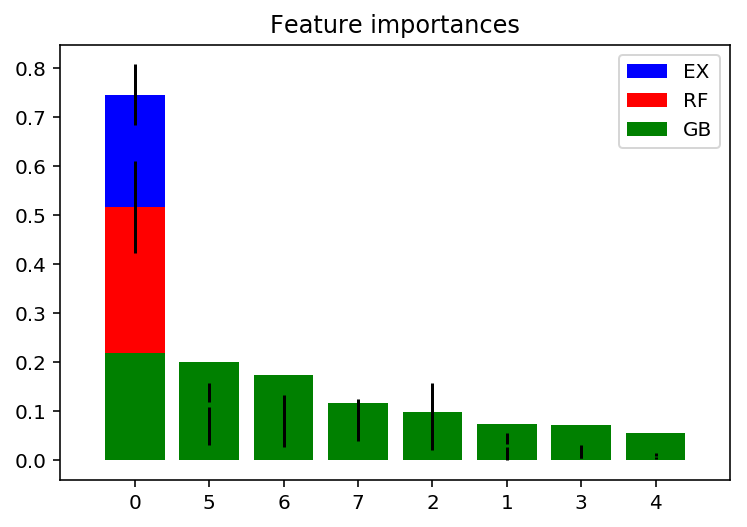

In [92]:
importances_RF = grid_cv_RF.best_estimator_.feature_importances_
std_RF = np.std([tree.feature_importances_ for tree in grid_cv_RF.best_estimator_.estimators_],
             axis=0)
indices_RF = np.argsort(importances_RF)[::-1]

importances_EX = grid_cv_EX.best_estimator_.feature_importances_
std_EX = np.std([tree.feature_importances_ for tree in grid_cv_EX.best_estimator_.estimators_],
             axis=0)
indices_EX = np.argsort(importances_EX)[::-1]

importances_GB = grid_cv_GB.best_estimator_.feature_importances_
#std_GB = np.std([tree.feature_importances_ for tree in grid_cv_GB.best_estimator_.estimators_],
             #axis=0)
indices_GB = np.argsort(importances_GB)[::-1]
# Print the feature ranking
# print("Feature ranking:")

# for f in range(X_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")

plt.bar(range(X_train.shape[1]), importances_EX[indices_EX],
       color="b", yerr=std_EX[indices_EX], align="center",label='EX')
plt.bar(range(X_train.shape[1]), importances_RF[indices_RF],
       color="r", yerr=std_RF[indices_RF], align="center", label='RF')

plt.bar(range(X_train.shape[1]), importances_GB[indices_GB],
       color="g", align="center",label='GB')
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.legend()
plt.show()

# XGBoost

In [133]:
estimator = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=100, min_child_weight=3)

In [134]:
%%time
estimator.fit(X_train,y_train)

Wall time: 634 ms


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=3, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [97]:
estimator.score(X_test,y_test)

0.81734435109349479

In [99]:
parameters_grid = {
    #'loss' : ['ls', 'lad', 'huber'],
    'learning_rate' : [0.05, 0.1, 0.5],
    'n_estimators' : np.arange(120,210,20),
    #'max_features' : [4,8],
    'max_depth' : [7,9,11]
    #'min_samples_leaf' : np.arange(1,8,2)
}
grid_cv_XGB = GridSearchCV(xgb.XGBRegressor(), parameters_grid, cv = 3)

In [101]:
%%time
grid_cv_XGB.fit(X_train,y_train)

Wall time: 2min 44s


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.5], 'n_estimators': array([ 60,  80, 100, 120, 140]), 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [102]:
print("best mean cross-validation score: {:.3f}".format(grid_cv_XGB.best_score_))
print("best parameters: {}".format(grid_cv_XGB.best_params_))
print("test-set score: {:.3f}".format(grid_cv_XGB.score(X_test, y_test)))

best mean cross-validation score: 0.827
best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 140}
test-set score: 0.832


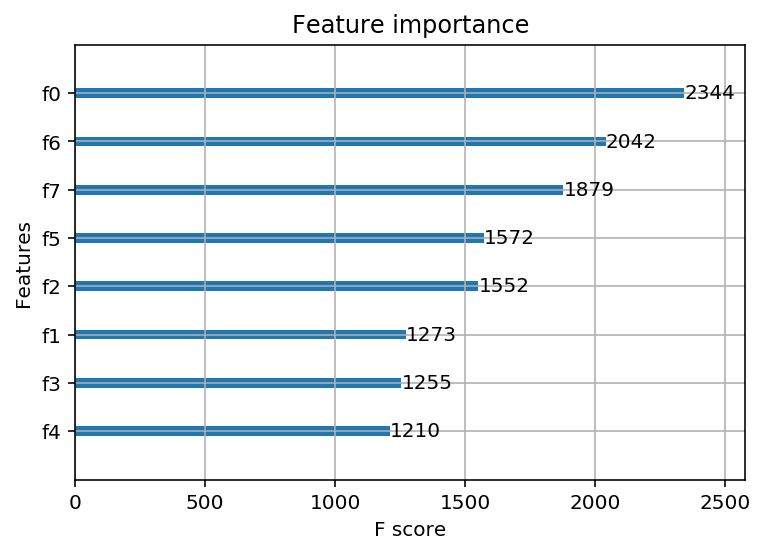

In [103]:
xgb.plot_importance(grid_cv_XGB.best_estimator_)

In [116]:
parameters_grid = {
    #'loss' : ['ls', 'lad', 'huber'],
    'learning_rate' : [ 0.1],
    'n_estimators' : np.arange(240,370,20),
    #'max_features' : [4,8],
    'max_depth' : [7]
    #'min_samples_leaf' : np.arange(1,8,2)
}
grid_cv_XGB = GridSearchCV(xgb.XGBRegressor(), parameters_grid, cv = 4)

In [117]:
%%time
grid_cv_XGB.fit(X_train,y_train)

Wall time: 3min 24s


GridSearchCV(cv=4, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1], 'n_estimators': array([240, 260, 280, 300, 320, 340, 360]), 'max_depth': [7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [118]:
print("best mean cross-validation score: {:.3f}".format(grid_cv_XGB.best_score_))
print("best parameters: {}".format(grid_cv_XGB.best_params_))
print("test-set score: {:.3f}".format(grid_cv_XGB.score(X_test, y_test)))

best mean cross-validation score: 0.836
best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 360}
test-set score: 0.838


# Question 4

Competition time! Use any model you want (and understand) to make the best model you can to predict the target in the below dataset.

Each student's submission will be ranked by:
* their performance (using [AUC ROC](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) as metric) and
* how well they did at predicting their generalisation error.

Your final rank will be the average of your two ranks.

To evaluate how good you did at predicting your generalisation error Tim will release a fresh test data set after the hand-in deadline. You can then re-run your trained classifier on that data and score its performance. We will rank students by the difference between that score and their predicted score.

You can read in the data using the `pandas` library. The final column of the file contains the target (zero or one).

In [2]:
pwd

'C:\\Users\\lukashch\\Documents\\GitHub\\advanced-comp-2018\\lecture-02'

In [3]:
import pandas as pd

# you might have to adjust the path to the dataset
df_train = pd.read_csv("challenge-train.csv", header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.000576,0.999939,12.769232,0.584357,0.136273,13.359463,3.358099,14655.587891,0.005370,0.041032,...,58935.695312,74241.648438,4598.116699,2.897916,2.932629,3.193417,267,-99,0.381424,0
1,0.001807,0.999996,18.585171,0.368892,0.054991,3.600483,6.781577,4145.290527,0.030382,0.034570,...,20553.839844,12501.964844,28162.607422,3.584545,3.010242,3.322494,128,1,0.781520,1
2,0.000858,0.999304,4.794842,0.149876,0.172385,16.130068,3.723242,4936.734375,0.017344,0.027622,...,7566.020020,11801.971680,16086.186523,2.700943,2.920070,2.407294,254,-99,0.508650,0
3,0.001519,0.999969,15.656528,0.312301,0.125831,8.113082,5.763765,4948.376465,0.035185,0.038973,...,19161.880859,18598.472656,17658.548828,3.108439,2.932674,3.164568,531,-99,0.682114,0
4,0.000936,0.999978,8.998086,0.475861,0.065347,3.863127,3.675261,4757.155762,0.022795,0.046165,...,12651.365234,33099.660156,10722.979492,2.873017,3.074762,4.136894,160,5,0.633693,1


In [4]:
# convert the pandas dataframe to a numpy array
# make sure you do not include the final column
# in your training data (X) but store it as target (y)
df_train = df_train.drop(columns=46)

X = df_train.as_matrix()[:, :-1]
y = df_train.as_matrix()[:, -1]

In [5]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,47,48
0,0.000576,0.999939,12.769232,0.584357,0.136273,13.359463,3.358099,14655.587891,0.005370,0.041032,...,376.700348,58935.695312,74241.648438,4598.116699,2.897916,2.932629,3.193417,267,0.381424,0
1,0.001807,0.999996,18.585171,0.368892,0.054991,3.600483,6.781577,4145.290527,0.030382,0.034570,...,2028.605591,20553.839844,12501.964844,28162.607422,3.584545,3.010242,3.322494,128,0.781520,1
2,0.000858,0.999304,4.794842,0.149876,0.172385,16.130068,3.723242,4936.734375,0.017344,0.027622,...,2874.089600,7566.020020,11801.971680,16086.186523,2.700943,2.920070,2.407294,254,0.508650,0
3,0.001519,0.999969,15.656528,0.312301,0.125831,8.113082,5.763765,4948.376465,0.035185,0.038973,...,1488.869995,19161.880859,18598.472656,17658.548828,3.108439,2.932674,3.164568,531,0.682114,0
4,0.000936,0.999978,8.998086,0.475861,0.065347,3.863127,3.675261,4757.155762,0.022795,0.046165,...,342.455688,12651.365234,33099.660156,10722.979492,2.873017,3.074762,4.136894,160,0.633693,1


In [27]:
sum(y==0)

17173

# Trying XGBoost

In [149]:
estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, min_child_weight=3)

In [151]:
%%time
estimator.fit(X,y)

Wall time: 8.18 s


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=3, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [152]:
%%time
cross_val_score(estimator, X,y, cv = 4)

Wall time: 25.9 s


array([ 0.9064972 ,  0.90782222,  0.91031111,  0.90168015])

In [153]:
RF = ensemble.RandomForestClassifier(max_depth=5, n_estimators=100, max_features = 15)

In [155]:
%%time
cross_val_score(RF, X,y, cv = 4, n_jobs=2)

Wall time: 52.7 s


array([ 0.8793885 ,  0.87706667,  0.88017778,  0.87678905])

In [158]:
parameters_grid_XGB = {
    #'loss' : ['ls', 'lad', 'huber'],
    'learning_rate' : [0.01, 0.05, 0.1, 0.5],
    'n_estimators' : np.arange(100,330,40),
    #'max_features' : [4,8],
    'max_depth' : [5,7,9]
    #'min_samples_leaf' : np.arange(1,8,2)
}
grid_cv_XGB = GridSearchCV(xgb.XGBClassifier(), parameters_grid_XGB, cv = 3, n_jobs=3)

In [159]:
%%time
grid_cv_XGB.fit(X,y)

Wall time: 55min 3s


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5], 'n_estimators': array([100, 140, 180, 220, 260, 300]), 'max_depth': [5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [160]:
print("best mean cross-validation score: {:.3f}".format(grid_cv_XGB.best_score_))
print("best parameters: {}".format(grid_cv_XGB.best_params_))
#print("test-set score: {:.3f}".format(grid_cv_XGB.score(X_test, y_test)))

best mean cross-validation score: 0.914
best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 220}


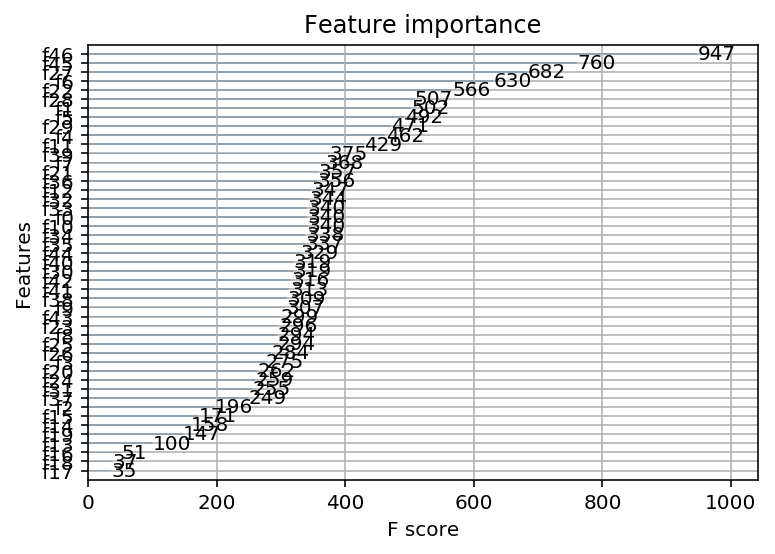

In [174]:
xgb.plot_importance(grid_cv_XGB.best_estimator_)

In [60]:
cross_val_score(xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=220, min_child_weight=3),X,y, cv=3)

array([ 0.9119392 ,  0.91493333,  0.91179412])

In [61]:
cross_val_score(xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=220, min_child_weight=3),X,y)

array([ 0.9119392 ,  0.91493333,  0.91179412])

In [69]:
parameters_grid_XGB = {
    'subsample': [0.6,0.7,0.8],
    'colsample_bytree': [0.8, 1], 
    'colsample_bylevel': [ 0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [ 0, 1, 3, 7, 10],
    'reg_lambda': [ 0, 1, 3, 7, 10]
}


In [71]:
grid_cv_XGB = grid_search.GridSearchCV(xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=220), parameters_grid_XGB,
                                             n_jobs=3, scoring = 'accuracy')

In [72]:
%%time
grid_cv_XGB.fit(X,y)

Wall time: 5h 22min 33s


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=220, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'subsample': [0.6, 0.7, 0.8], 'colsample_bytree': [0.8, 1], 'colsample_bylevel': [0.6, 0.7, 0.8, 0.9], 'reg_alpha': [0, 1, 3, 7, 10], 'reg_lambda': [0, 1, 3, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [73]:
print("best mean cross-validation score: {:.3f}".format(grid_cv_XGB.best_score_))
print("best parameters: {}".format(grid_cv_XGB.best_params_))

best mean cross-validation score: 0.915
best parameters: {'colsample_bylevel': 0.8, 'colsample_bytree': 1, 'reg_alpha': 7, 'reg_lambda': 1, 'subsample': 0.8}


# Best score

In [78]:
cross_val_score(xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=220, min_child_weight=3,
                                  subsample=0.8, reg_lambda=1, reg_alpha=7, colsample_bytree=1,
                                  colsample_bylevel=0.75,seed=1),X,y,cv=3)

array([ 0.9135391 ,  0.91653333,  0.91372758])

In [79]:
cross_val_score(xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=220,
                                  subsample=0.8, reg_lambda=1, reg_alpha=7, colsample_bytree=1,
                                  colsample_bylevel=0.75,seed=1),X,y,cv=3)

array([ 0.91347244,  0.9162    ,  0.91226082])

In [80]:
cross_val_score(xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=220, min_child_weight=3,
                                  subsample=0.8, reg_lambda=1, reg_alpha=7, colsample_bytree=1,
                                  colsample_bylevel=0.8,seed=1),X,y,cv=3)

array([ 0.91313912,  0.91473333,  0.91306087])

# Random Forest

In [161]:
parameters_grid_RF = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [100,200,300],
    'max_features' : [4,7,10],
    'max_depth' : [6,9,12],
    #'min_samples_leaf' : [1,5,10]
}
grid_cv_RF = GridSearchCV(ensemble.RandomForestClassifier(), parameters_grid_RF, cv = 3, n_jobs=3)

In [162]:
%%time
grid_cv_RF.fit(X,y)

Wall time: 45min 29s


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [100, 200, 300], 'max_features': [4, 7, 10], 'max_depth': [6, 9, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [163]:
print("best mean cross-validation score: {:.3f}".format(grid_cv_RF.best_score_))
print("best parameters: {}".format(grid_cv_RF.best_params_))

best mean cross-validation score: 0.898
best parameters: {'criterion': 'gini', 'max_depth': 12, 'max_features': 10, 'n_estimators': 300}


In [164]:
grid_cv_EX = GridSearchCV(ensemble.ExtraTreesClassifier(), parameters_grid_RF, cv = 3, n_jobs=3)

# Checking if LogRegression works

In [6]:
import seaborn as sns

In [52]:
plot = df_train[[1,45,47,48]]

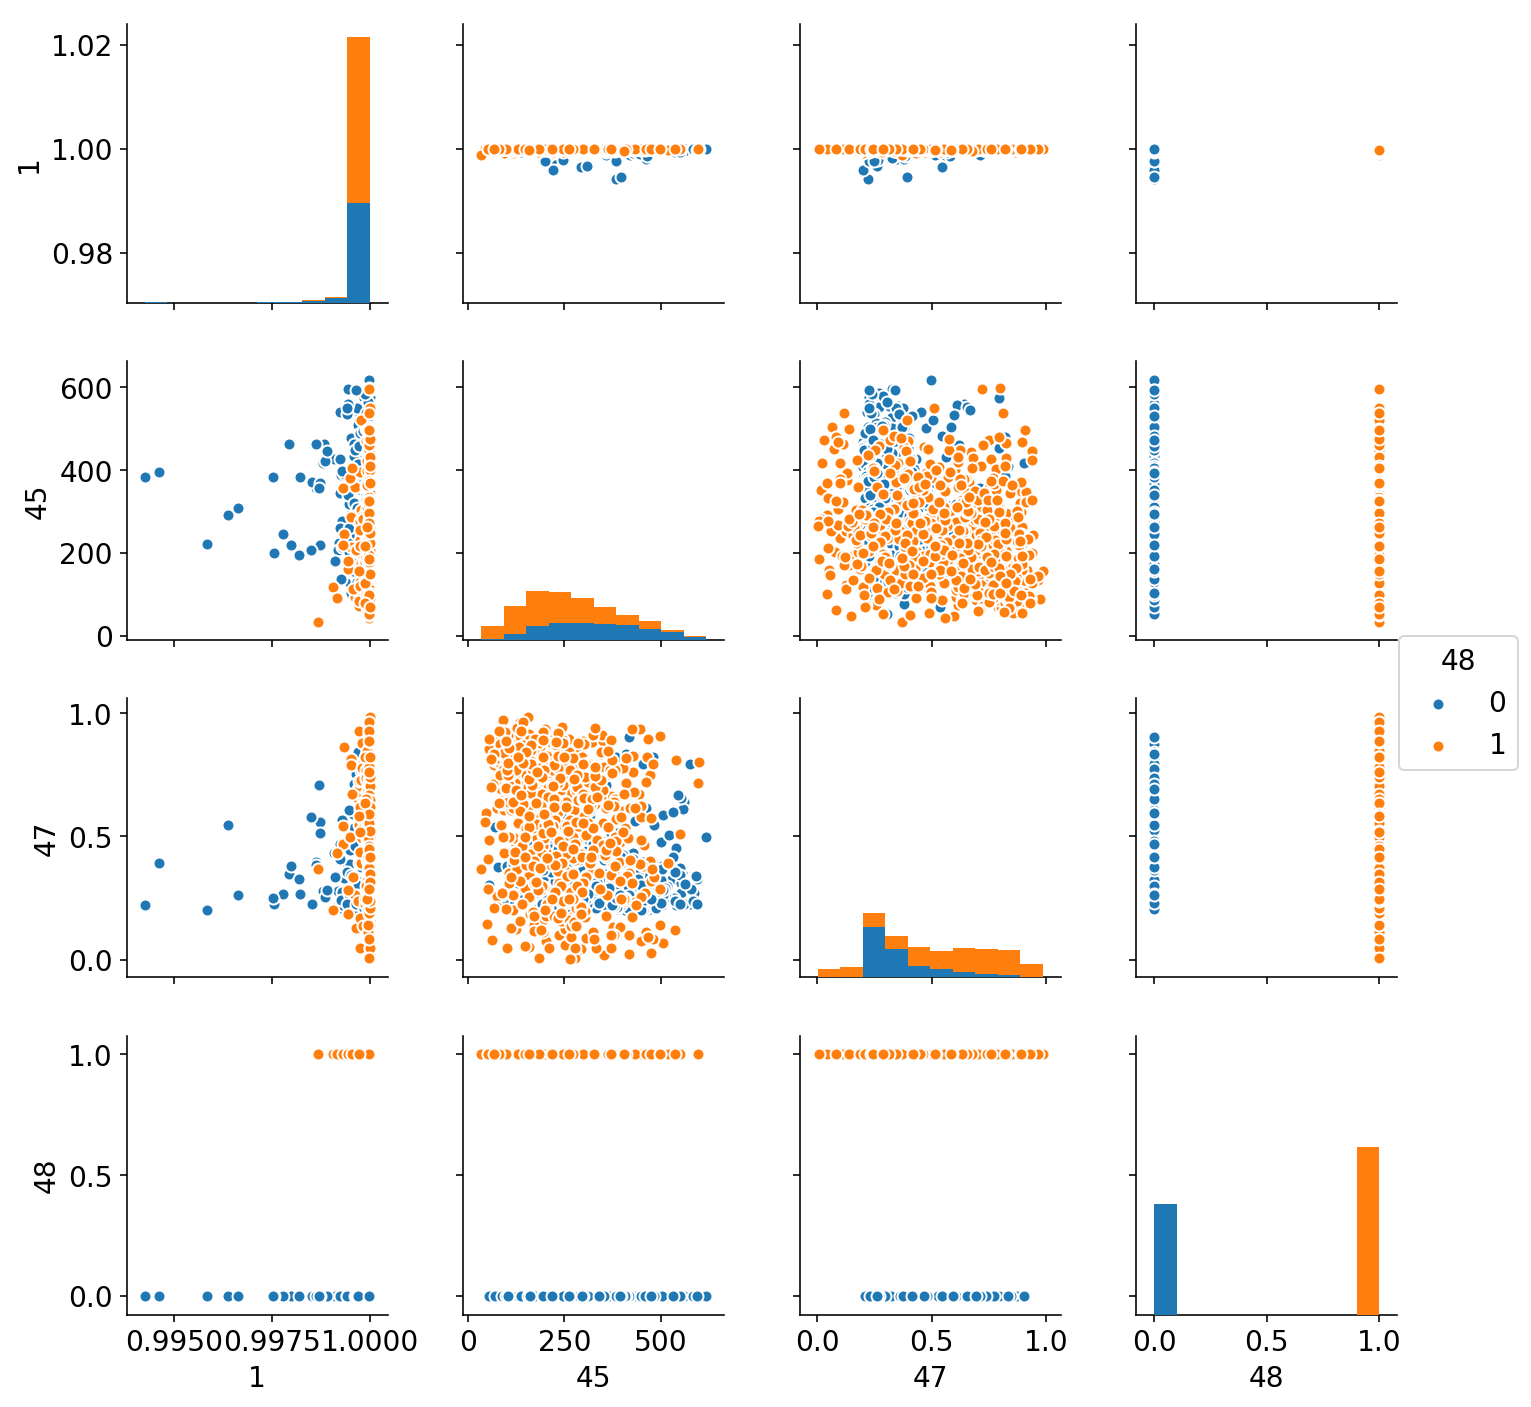

In [54]:
sns.pairplot(plot.sample(1000), hue = 48)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.7,stratify=y)

C:\Users\lukashch\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
classifier = LogisticRegression()
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [37]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1','l2'],
    }
cv = 3

In [40]:
grid_cv = grid_search.GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid,scoring = 'accuracy', cv = cv, n_jobs=3)


In [41]:
%%time
grid_cv.fit(X_train_scaled,y_train)

Wall time: 51 s


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [44]:
print("best mean cross-validation score: {:.3f}".format(grid_cv.best_score_))
print("best parameters: {}".format(grid_cv.best_params_))
#print("test-set score: {:.3f}".format(grid_cv_XGB.score(X_test, y_test)))

best mean cross-validation score: 0.867
best parameters: {'C': 1, 'penalty': 'l2'}


In [45]:
grid_cv.score(X_test_scaled,y_test)

0.8694911488037923